# Classification

In [7]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Dense

from keras.optimizers import Adam, SGD

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import classification_report

In [8]:
df = pd.read_csv('user_visit_duration.csv')

df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


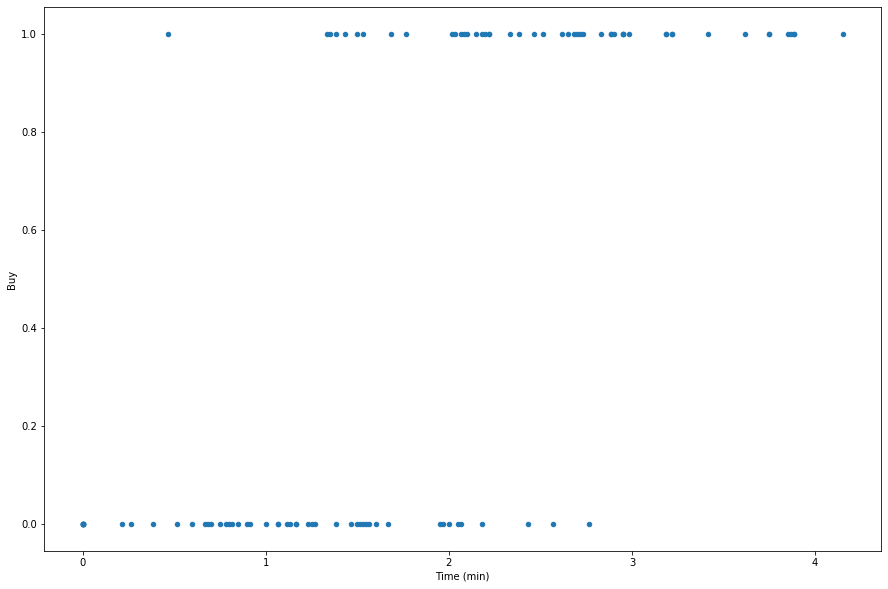

In [9]:
df.plot(kind = 'scatter', x = 'Time (min)', y = 'Buy', figsize = (15, 10));

In [10]:
model = Sequential()

model.add(Dense(1, input_shape = (1, ), activation = 'sigmoid'))

In [11]:
model.compile(SGD(lr = 0.5), 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
X = df[['Time (min)']].values

y = df['Buy'].values

model.fit(X, y, epochs = 25)

W1019 21:01:43.354947  8236 deprecation_wrapper.py:119] From C:\Users\Sefa3\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/25
100/100 [==============================] - 0s 2ms/step - loss: 1.4802 - acc: 0.3900
Epoch 2/25
100/100 [==============================] - 0s 50us/step - loss: 0.6987 - acc: 0.5000
Epoch 3/25
100/100 [==============================] - 0s 60us/step - loss: 0.6369 - acc: 0.5400
Epoch 4/25
100/100 [==============================] - 0s 60us/step - loss: 0.6131 - acc: 0.5800
Epoch 5/25
100/100 [==============================] - 0s 70us/step - loss: 0.5961 - acc: 0.6200
Epoch 6/25
100/100 [==============================] - 0s 70us/step - loss: 0.5360 - acc: 0.7300
Epoch 7/25
100/100 [==============================] - 0s 60us/step - loss: 0.5194 - acc: 0.7800
Epoch 8/25
100/100 [==============================] - 0s 60us/step - loss: 0.5111 - acc: 0.7800
Epoch 9/25
100/100 [==============================] - 0s 70us/step - loss: 0.4920 - acc: 0.8100
Epoch 10/25
100/100 [==============================] - 0s 70us/step - loss: 0.4774 - acc: 0.7900
Epoch 11/25
100/100 [===================

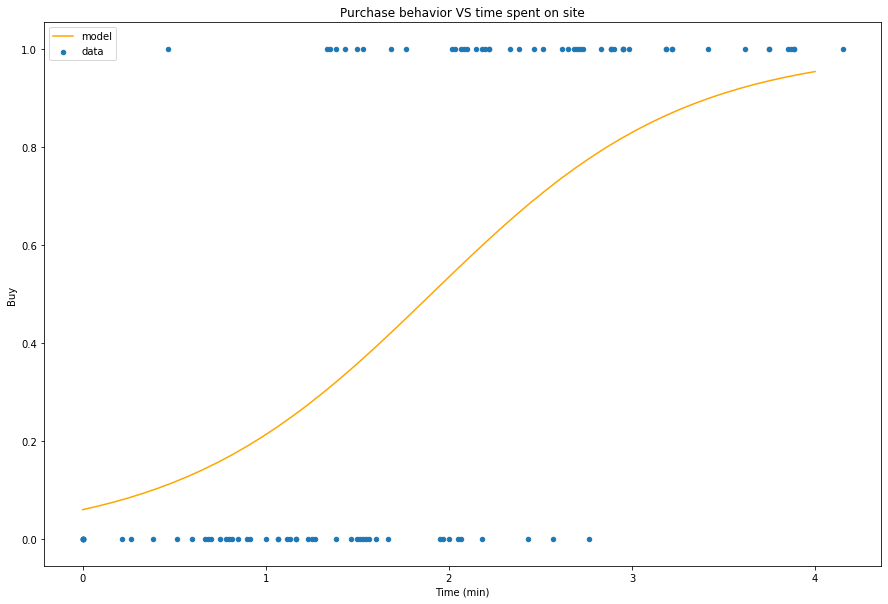

In [14]:
ax = df.plot(kind    = 'scatter', 
             x       = 'Time (min)', 
             y       = 'Buy',
             title   = 'Purchase behavior VS time spent on site',
             figsize = (15, 10)
            );

temp = np.linspace(0, 4)

ax.plot(temp, model.predict(temp), color = 'orange');

plt.legend(['model', 'data']);

In [20]:
model.predict(temp)[:10]

array([[0.06000528],
       [0.06701368],
       [0.07477555],
       [0.08335605],
       [0.09282243],
       [0.10324278],
       [0.11468506],
       [0.1272155 ],
       [0.14089721],
       [0.1557877 ]], dtype=float32)

In [21]:
# predicted probabilities that greater than 0.5

temp_class = model.predict(temp) > 0.5

temp_class[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

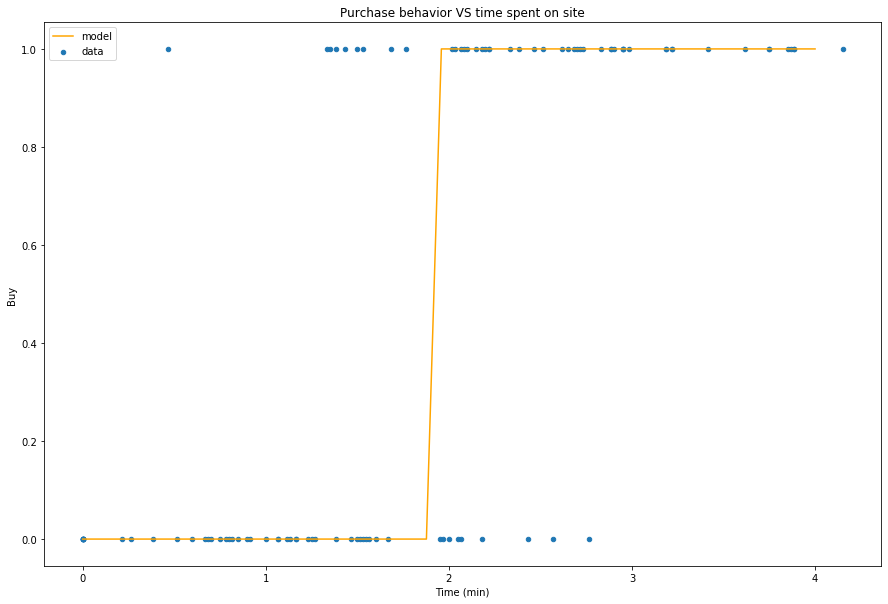

In [22]:
ax = df.plot(kind    = 'scatter',
             x       = 'Time (min)',
             y       = 'Buy',
             title   = 'Purchase behavior VS time spent on site',
             figsize = (15, 10))

temp = np.linspace(0, 4)

ax.plot(temp, temp_class, color = 'orange')

plt.legend(['model', 'data']);

In [24]:
y_pred = model.predict(X)

y_pred[:10]

array([[0.53451586],
       [0.14627525],
       [0.8694608 ],
       [0.18983766],
       [0.3691219 ],
       [0.80448717],
       [0.16860425],
       [0.346987  ],
       [0.24268565],
       [0.13187015]], dtype=float32)

In [25]:
y_class_pred = y_pred > 0.5

y_class_pred[:10]

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False]])

In [27]:
y

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [26]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.820


---------

# Train / Test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
params = model.get_weights() # get the weights from the model

params = [np.zeros(w.shape) for w in params] # reset to 0

model.set_weights(params) # setting weights, using the new parameters.

In [30]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [31]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [32]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))

print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.825
The test accuracy score is 0.850


------------

# Cross Validation

In [33]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape = (1,), activation = 'sigmoid'))
    model.compile(SGD(lr = 0.5),
                  'binary_crossentropy',
                  metrics = ['accuracy']
                 )
    return model

In [34]:
model = KerasClassifier(build_fn = build_logistic_regression_model,
                        epochs   = 25,
                        verbose  = 0
                       )

In [36]:
cv = KFold(3, shuffle = True)  # cross validation

In [37]:
scores = cross_val_score(model, X, y, cv = cv)

In [38]:
scores

array([0.76470588, 0.81818182, 0.81818182])

In [39]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8004 ± 0.0252


------------

# Confusion Matrix

In [40]:
y

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [42]:
y_class_pred[:10]

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False]])

In [43]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 9, 41]], dtype=int64)

In [44]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred) # confusion matrix
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index = labels, columns = pred_labels)
    return df

In [45]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,9,41


In [46]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))

print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))

print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.820
Recall:  	0.820
F1 Score:	0.820


In [47]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.82      0.82      0.82        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



-------------